In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Column labels
features = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "outcome"
]

# Read the data set and add the column names
df = pd.read_csv("kddcup.data", names=features)

# Show the data set
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [2]:
# Map the outcome values to 1 if there is an attack and 0 if there is not
is_attack = df.outcome.map(lambda a: 0 if a == 'normal.' else 1)
df['is_attack'] = is_attack

In [3]:
# Create map for the attack types
# Open and file and read it
with open("training_attack_types.txt", "r") as file:
    attack_types_map = {}
    for line in file:
        # Strip the line and split only if it contains exactly two parts
        parts = line.strip().split()
        if len(parts) == 2:
            attack, attack_type = parts
            attack_types_map[attack] = attack_type

attack_types_map

# Add 'normal' mapping to handle records with no attack
attack_types_map["normal"] = "none"

df["attack_type"] = df.outcome.apply(lambda x: x.rstrip('.')).map(attack_types_map)

# Encode attack_type to numerical values
label_encoder = LabelEncoder()
df["attacks_type_encoded"] = label_encoder.fit_transform(df["attack_type"])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,is_attack,attack_type,attacks_type_encoded
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.00,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1
2,0,tcp,http,SF,236,1228,0,0,0,0,...,0.50,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1
3,0,tcp,http,SF,233,2032,0,0,0,0,...,0.33,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1
4,0,tcp,http,SF,239,486,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1


In [4]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

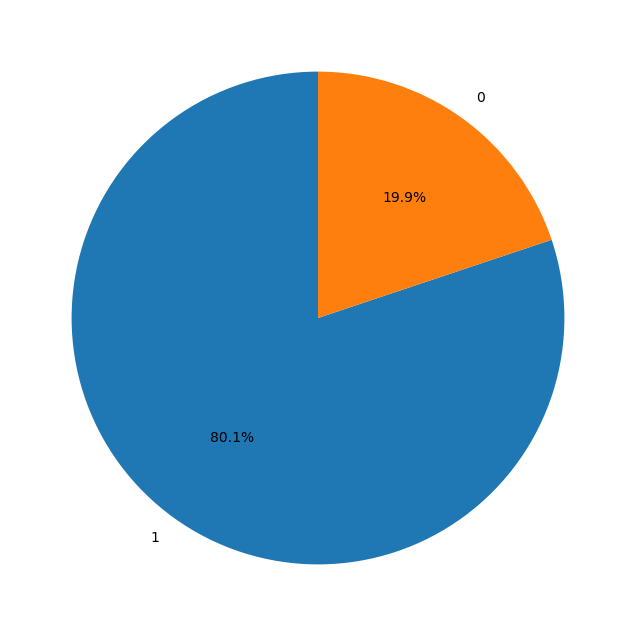

In [6]:
# Create a pie chart for the 'is_attack' column
df["is_attack"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.ylabel('')
plt.show()

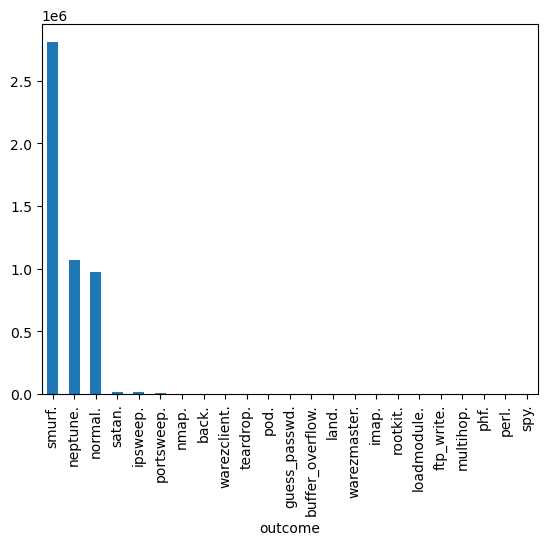

In [7]:
# Create a column chart for the 'outcome' column
ax = df["outcome"].value_counts().plot(kind='bar')

plt.ylabel('')
plt.show()

In [8]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,is_attack,attack_type,attacks_type_encoded
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.00,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1
2,0,tcp,http,SF,236,1228,0,0,0,0,...,0.50,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1
3,0,tcp,http,SF,233,2032,0,0,0,0,...,0.33,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1
4,0,tcp,http,SF,239,486,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,normal.,0,none,1


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each non-numeric column
for column in df.select_dtypes(include=['object']).columns:
    # Use .loc to avoid SettingWithCopyWarning
    df.loc[:, column] = label_encoder.fit_transform(df[column])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,is_attack,attack_type,attacks_type_encoded
0,0,1,24,9,215,45076,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,11,0,1,1
1,0,1,24,9,162,4528,0,0,0,0,...,1.00,0.0,0.0,0.0,0.0,0.0,11,0,1,1
2,0,1,24,9,236,1228,0,0,0,0,...,0.50,0.0,0.0,0.0,0.0,0.0,11,0,1,1
3,0,1,24,9,233,2032,0,0,0,0,...,0.33,0.0,0.0,0.0,0.0,0.0,11,0,1,1
4,0,1,24,9,239,486,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,11,0,1,1


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,is_attack,attack_type
0,0,1,24,9,215,45076,0,0,0,0,...,1.0,0.0,0.00,0,0,0.0,0.00,0.00,0,1
1,0,1,24,9,162,4528,0,0,0,0,...,1.0,0.0,0.00,1,1,0.0,1.00,0.00,0,1
2,0,1,24,9,236,1228,0,0,0,0,...,1.0,0.0,0.00,2,2,0.0,0.50,0.00,0,1
3,0,1,24,9,233,2032,0,0,0,0,...,1.0,0.0,0.00,3,3,0.0,0.33,0.00,0,1
4,0,1,24,9,239,486,0,0,0,0,...,1.0,0.0,0.00,4,4,0.0,0.25,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,1,24,9,212,2288,0,0,0,0,...,1.0,0.0,0.16,3,255,0.0,0.33,0.05,0,1
4898427,0,1,24,9,219,236,0,0,0,0,...,1.0,0.0,0.15,4,255,0.0,0.25,0.05,0,1
4898428,0,1,24,9,218,3610,0,0,0,0,...,1.0,0.0,0.15,5,255,0.0,0.20,0.05,0,1
4898429,0,1,24,9,219,1234,0,0,0,0,...,1.0,0.0,0.14,6,255,0.0,0.17,0.05,0,1


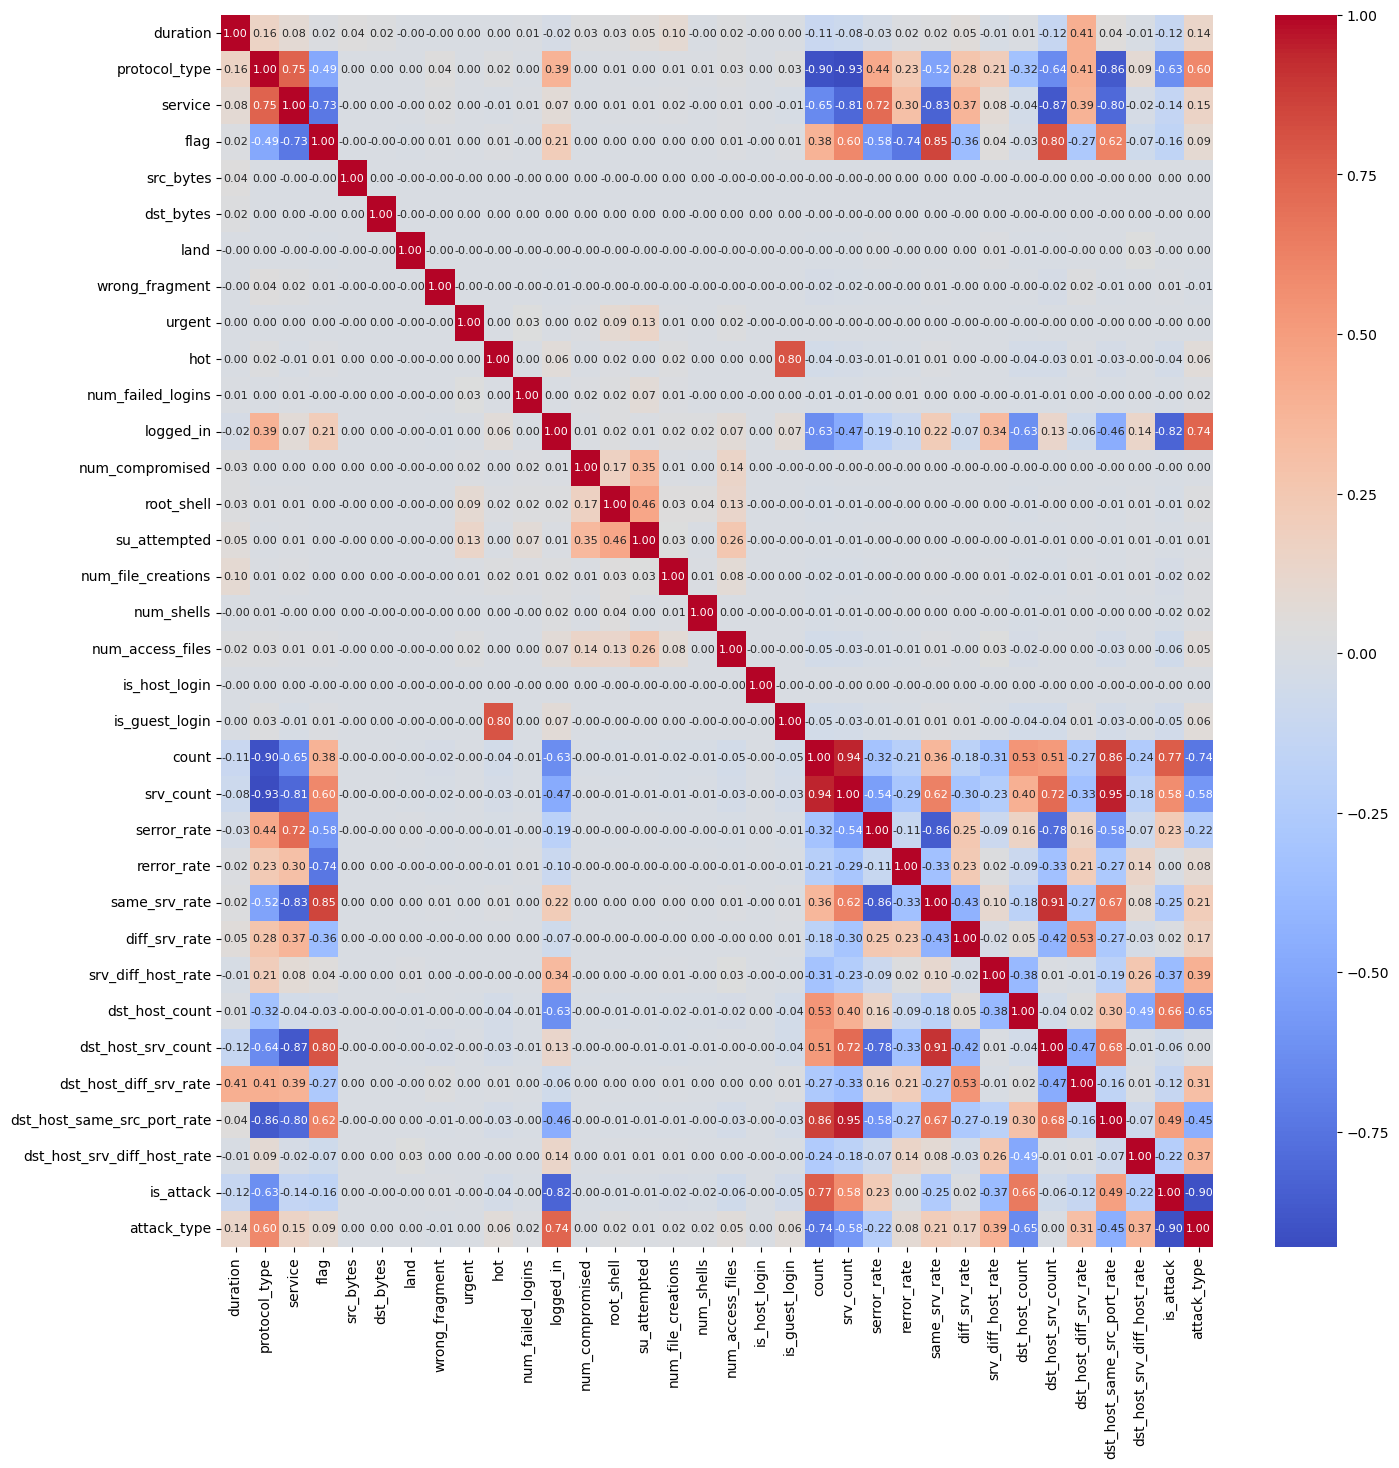

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove columns with only one unique value and create a copy
df = df.loc[:, df.nunique() > 1].copy()

# Calculate the correlation matrix
corr = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})

In [ ]:
# Identify and drop highly correlated features
# Set a threshold for correlation
threshold = 0.95
to_drop = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            to_drop.add(colname)

# Drop the correlated features
df = df.drop(columns=to_drop)

df